# Optogenetic Control of *Drosophila* Courtship Behavior
## Step 1: Segment Recordings
In this first step, the *Drosophila* recordings are algorithmically segmented into periods of sine song and pulse song using the [FlySongSegmenter](https://github.com/FlyCourtship/FlySongSegmenter) software [(Arther et al., 2013)](https://bmcbiol.biomedcentral.com/articles/10.1186/1741-7007-11-11). This software is available in Matlab only. A wrapper script, *SegmentWrapper.m*, was used to iteratively apply the software to each recording and dump the raw data, sine songs, and pulse songs into one file. 

**Note:** Using *FlySongSegmenter*, we use only the sine songs from *Sines.LengthCull* and the pulse songs from *Pulses.ModelCull2*. These are more conservative estimates of periods of fly song in the recordings. See the Github for details.

## Step 2: 

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from scipy.io import loadmat
from scipy.stats import cauchy
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

files = [f for f in os.listdir('raw') if f.endswith('mat')]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

for f in files:

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Load and prepare data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Load mat file.
    mat = loadmat('raw/%s' %f)
    
    ## Extract data.
    data, times, sines, pulses = mat['d'], mat['times'], mat['sines'], mat['pulses']
    times = times.squeeze()
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Interpulse interval (IPI) statistics.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Compute interpulse interval.
    IPI = np.diff(times[pulses[0]-1]) # 0-indexing
    
    ## Fit Cauchy (Student-t, df=1) to IPI.
    mu, sd = cauchy.fit(IPI)
    
    ## CDF threshold.
    CDF = cauchy(mu, sd).cdf(IPI)
    CDF = np.where(CDF > 0.5, 1 - CDF, CDF)
    mask = CDF > 0.05
    
    
    
    ## 

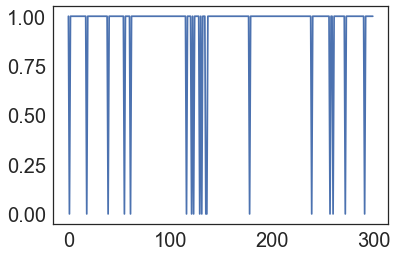

In [64]:
plt.plot(mask[:300])

In [68]:
from scipy.ndimage import measurements

clusters, n_cluster = measurements.label(mask)
measurements.

array([ 1,  0,  2, ..., 65, 65,  0], dtype=int32)

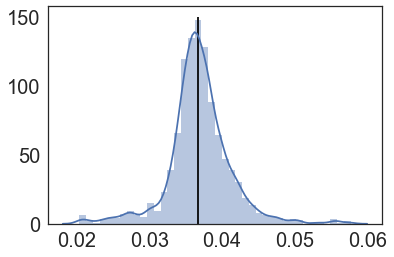

In [46]:
from scipy.stats import cauchy
x = np.diff(times[pulses[0]-1])
mu, sd = cauchy.fit(x)
x = x[x < 0.06]
sns.distplot(x,bins=40)
plt.vlines(mu, 0, 150)

In [43]:
x = np.diff(times[pulses[0]-1])
t.fit_loc_scale(x, df=1)

TypeError: fit_loc_scale() got an unexpected keyword argument 'df'

In [45]:
from scipy.stats import cauchy
x = np.diff(times[pulses[0]-1])

cauchy.fit(x)

(0.036736409744784454, 0.0020921360503521691)

In [23]:
x = np.diff(times[pulses[0]-1])
np.median(x)

0.036999999999977717